In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_csv("Classification-dataset.csv")

In [3]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


***Data preprocessing***

In [4]:
data.loc[data['Sex']=='Male','Sex']=1
data.loc[data['Sex']=='Female','Sex']=0

In [7]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [10]:
x = data.drop(['Sex'], axis=1)
y = data['Sex']

In [35]:
# Normalization - for the Error handling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [36]:
x.head()

,Height,Weight
0,146.323241,59.861065
1,175.695412,77.863687
2,183.216164,72.131992
3,184.245269,77.546000
4,132.302261,55.188496


In [38]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [39]:
y=y.astype('int')

In [40]:
y.dtype

dtype('int64')

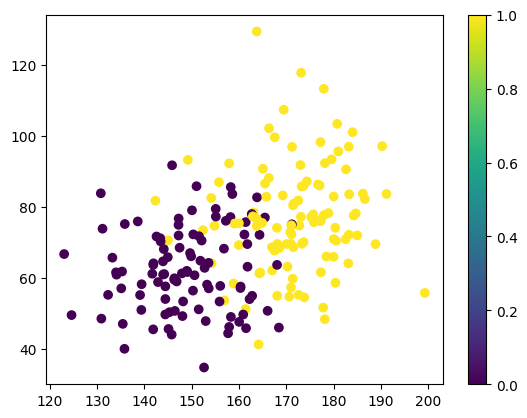

In [41]:
plt.scatter(x['Height'],x['Weight'],c=y)
plt.colorbar()
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
x_train.shape,x_test.shape

((164, 2), (41, 2))

## ***Model Building***

In [57]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["accuracy"])

# train the model
epoch_number = 10
history = model.fit(x_train, y_train, epochs=epoch_number)

Epoch 1/10
6/6 [==============================] - 1s 4ms/step - loss: 0.6804 - accuracy: 0.5244
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.7439
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6181 - accuracy: 0.7988
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.5732
Epoch 5/10
6/6 [==============================] - 0s 4ms/step - loss: 0.5658 - accuracy: 0.8354
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.8659
Epoch 7/10
6/6 [==============================] - 0s 4ms/step - loss: 0.4979 - accuracy: 0.7683
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.8598
Epoch 9/10
6/6 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.8598
Epoch 10/10
6/6 [==============================] - 0s 4ms/step - loss: 0.3263 - accuracy: 0.8415


In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 16)                1040      
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9697 (37.88 KB)
Trainable params: 9697 (37.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***Model Evaluate***

In [59]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.2532 - accuracy: 0.9268


[0.2531993091106415, 0.9268292784690857]

In [60]:
y_pred = model.predict(x_test)
y_pred[:5]

2/2 [==============================] - 0s 6ms/step


array([[0.06542926],
       [0.95907366],
       [0.9768975 ],
       [0.16053551],
       [0.8739058 ]], dtype=float32)

In [61]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

In [62]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9047619>

In [63]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

In [64]:
history.history


{'loss': [0.6803804039955139,
  0.6502967476844788,
  0.6180980205535889,
  0.6020712852478027,
  0.5658315420150757,
  0.5244110226631165,
  0.49790507555007935,
  0.4306296706199646,
  0.3527753949165344,
  0.3262979984283447],
 'accuracy': [0.5243902206420898,
  0.7439024448394775,
  0.7987805008888245,
  0.5731707215309143,
  0.8353658318519592,
  0.8658536672592163,
  0.7682926654815674,
  0.8597561120986938,
  0.8597561120986938,
  0.8414633870124817]}

<Axes: >

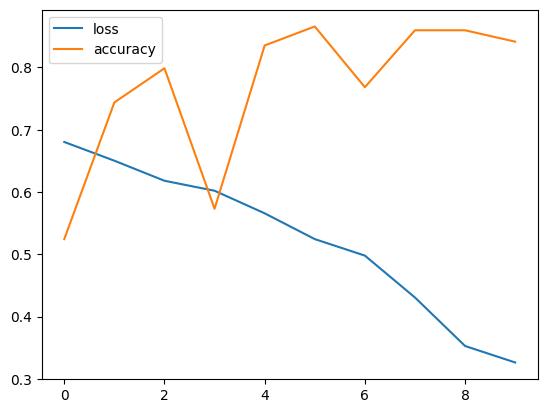

In [65]:
pd.DataFrame(history.history).plot()

***Multi classing***

In [73]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
             metrics = ["accuracy"])

# train the model
epoch_number = 10
history = model.fit(x_train, y_train, epochs=epoch_number)

Epoch 1/10
6/6 [==============================] - 1s 3ms/step - loss: 0.6599 - accuracy: 0.5427
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6172 - accuracy: 0.6341
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.5915
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.6890
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.8598
Epoch 6/10
6/6 [==============================] - 0s 4ms/step - loss: 0.4920 - accuracy: 0.8780
Epoch 7/10
6/6 [==============================] - 0s 4ms/step - loss: 0.4376 - accuracy: 0.8110
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.7927
Epoch 9/10
6/6 [==============================] - 0s 4ms/step - loss: 0.3797 - accuracy: 0.8415
Epoch 10/10
6/6 [==============================] - 0s 5ms/step - loss: 0.3503 - accuracy: 0.8780


In [74]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                192       
                                                                 
 dense_20 (Dense)            (None, 16)                1040      
                                                                 
 dense_21 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1266 (4.95 KB)
Trainable params: 1266 (4.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.3576 - accuracy: 0.8537


[0.3576424717903137, 0.8536585569381714]

In [76]:
y_pred = model.predict(x_test)
y_pred[:5]

2/2 [==============================] - 0s 6ms/step


array([[0.71766186, 0.28233817],
       [0.05301732, 0.9469826 ],
       [0.03647711, 0.9635229 ],
       [0.45333737, 0.5466625 ],
       [0.10346777, 0.89653224]], dtype=float32)

In [77]:
import numpy as np
y_pred = np.argmax(y_pred,axis=1)
y_pred[:5]

array([0, 1, 1, 1, 1])

In [78]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

In [79]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7692308>

In [80]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [81]:
history.history

{'loss': [0.6598803400993347,
  0.6172177195549011,
  0.5955114364624023,
  0.5448107719421387,
  0.5166792273521423,
  0.49196508526802063,
  0.43760359287261963,
  0.41588735580444336,
  0.37971657514572144,
  0.3502891957759857],
 'accuracy': [0.542682945728302,
  0.6341463327407837,
  0.5914633870124817,
  0.6890243887901306,
  0.8597561120986938,
  0.8780487775802612,
  0.8109756112098694,
  0.792682945728302,
  0.8414633870124817,
  0.8780487775802612]}

<Axes: >

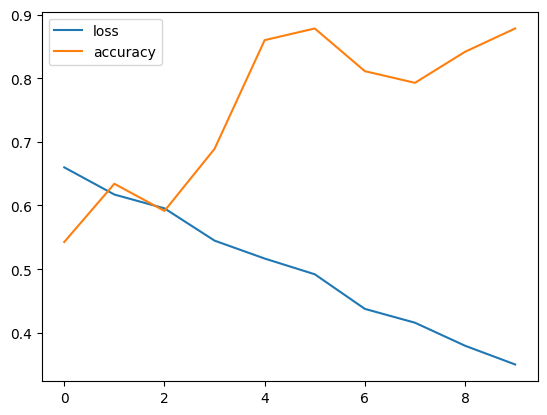

In [82]:
pd.DataFrame(history.history).plot()